# Kensho Technologies Workshop - January 29th, 2019
## Linking Datasets

Purpose of this notebook is an exercise in attempt to combine two datasets with imperfect information.

### To Dos:

1. What are differences in how names are written across datasets?
2. Find 100 new links between the datasets
3. Find 100 new entities in Dataset 1 not in Dataset 2

In [21]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import datasets
ishares = pd.read_csv('../data/ai_meetup_data/ishares_companies.csv')
wikidata = pd.read_csv('../data/ai_meetup_data/wikidata_companies.csv')
labels = pd.read_csv('../data/ai_meetup_data/labeled_data.csv')

In [3]:
ishares.head()

,ishares_id,Name,Country,Sector,Ticker,Market Value
0,0,ENEL,Italy,Utilities,ENEL,"35,606,728.17"
1,1,ENI,Italy,Energy,ENI,"30,934,624.17"
2,2,INTESA SANPAOLO,Italy,Financials,ISP,"25,171,216.82"
3,3,UNICREDIT,Italy,Financials,UCG,"17,460,161.24"
4,4,ASSICURAZIONI GENERALI,Italy,Financials,G,"11,332,119.83"


In [4]:
wikidata.head()

,wikidata_id,item_title,country
0,Q1191932,0verflow,NaN
1,Q4545742,1-2-3,Norway
2,Q4545758,1-800 Contacts,United States of America
3,Q4545749,1-800-FREE-411,United States of America
4,Q4545754,1-800-GOT-JUNK?,NaN


In [5]:
labels.head()

,ishares_id,wikidata_id
0,0,Q651222
1,1,Q565594
2,2,Q1343118
3,3,Q45568
4,4,Q670482


### Data Preparation

In [6]:
# rename columns of wikidata dataset to match relevant columns of ishares data
wikidata.rename(columns={'item_title': 'Name', 'country': 'Country'}, inplace=True)

In [28]:
# change market value in ishares to a numeric type
ishares['Market Value'] = ishares['Market Value'].str.replace(',','').astype(float)

In [7]:
# change Name to all lowercase for both datasets
ishares.Name = ishares.Name.str.lower()
wikidata.Name = wikidata.Name.str.lower()

## Exploratory Data Analysis

### 1. Metadata
What can I learn about each dataset from the information given, before getting into any NLP or feature engineering?

    -Country data
    -Industry data
    -Company Size
    -Alphabetical Distribution

In [29]:
# ishares data
ishares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3836 entries, 0 to 3835
Data columns (total 6 columns):
ishares_id      3836 non-null int64
Name            3836 non-null object
Country         3836 non-null object
Sector          3836 non-null object
Ticker          3836 non-null object
Market Value    3836 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 179.9+ KB


In [9]:
ishares.head()

,ishares_id,Name,Country,Sector,Ticker,Market Value
0,0,enel,Italy,Utilities,ENEL,"35,606,728.17"
1,1,eni,Italy,Energy,ENI,"30,934,624.17"
2,2,intesa sanpaolo,Italy,Financials,ISP,"25,171,216.82"
3,3,unicredit,Italy,Financials,UCG,"17,460,161.24"
4,4,assicurazioni generali,Italy,Financials,G,"11,332,119.83"


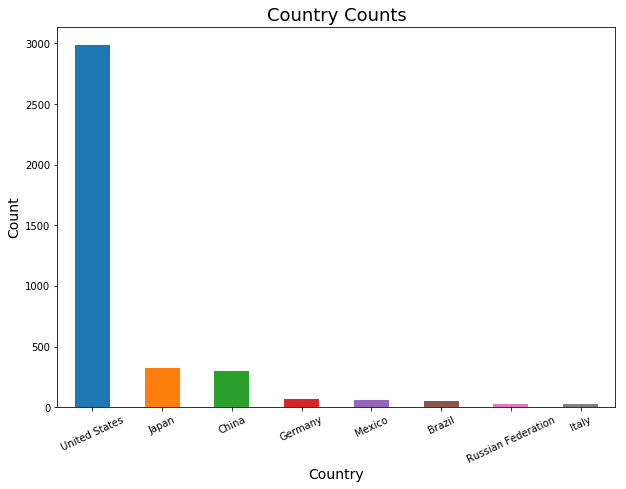

In [17]:
# create a bar plot of country counts - ishares dataset
countries = ishares.Country.unique()

country_counts = ishares['Country'].value_counts()

plt.figure(figsize=(10,7))
country_counts.plot(kind='bar')
plt.title('Country Counts', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.xticks(rotation=25)
plt.ylabel('Count', fontsize=14);

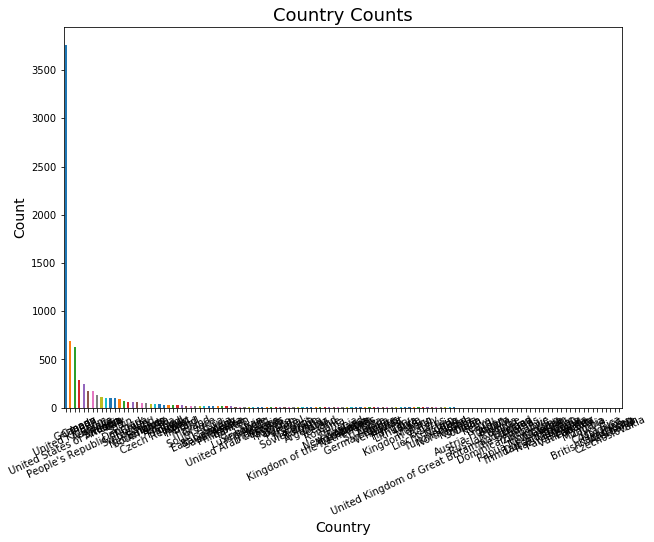

In [19]:
# create a bar plot of country counts - wikidata
countries = wikidata.Country.unique()

country_counts = wikidata['Country'].value_counts()

plt.figure(figsize=(10,7))
country_counts.plot(kind='bar')
plt.title('Country Counts', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.xticks(rotation=25)
plt.ylabel('Count', fontsize=14);

### Note

Country data on wikidata is messier. I'll have to look into why there are so many different countries. Also, Country may not be a perfect feature. The same company could be associated with more than one country, and with a different country in each dataset.

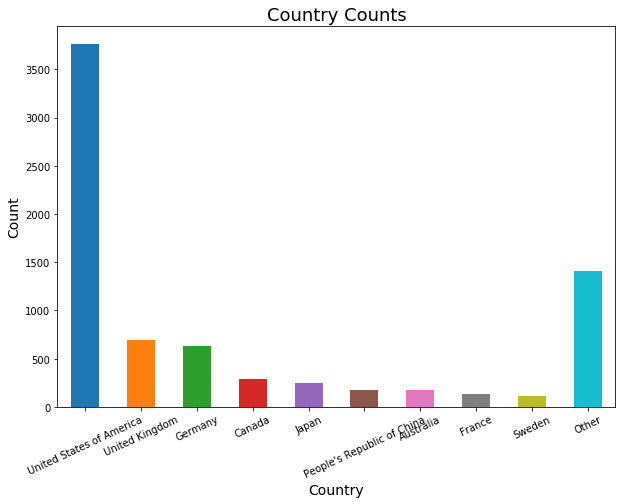

In [16]:
# create a bar plot of country counts - wikidata
countries = wikidata.Country.unique()

# similar to above, with a workaround to group all uncommon labels into 'other'
country_counts = wikidata['Country'].value_counts()
threshold = 100
mask = country_counts > threshold
other = country_counts[~mask].sum()
country_counts = country_counts[mask]
country_counts['Other'] = other

plt.figure(figsize=(10,7))
country_counts.plot(kind='bar')
plt.title('Country Counts', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.xticks(rotation=25)
plt.ylabel('Count', fontsize=14);

plt.show();

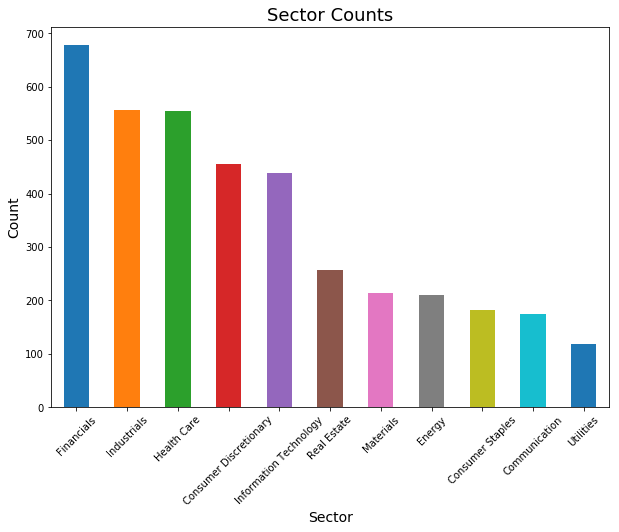

In [20]:
# create a bar plot of sector counts
sectors = ishares.Sector.unique()

sector_counts = ishares['Sector'].value_counts()

plt.figure(figsize=(10,7))
sector_counts.plot(kind='bar')
plt.title('Sector Counts', fontsize=18)
plt.xlabel('Sector', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize=14);

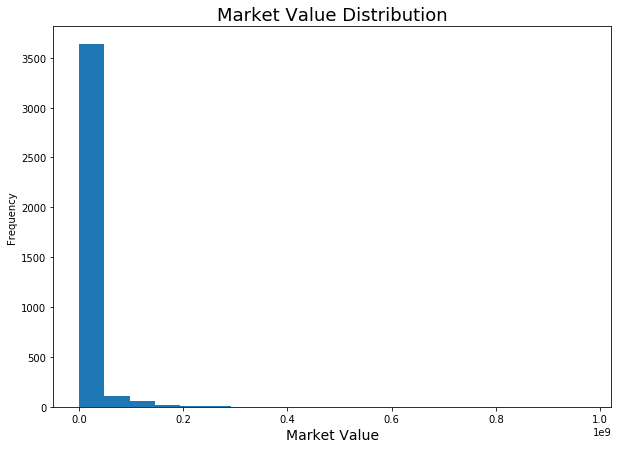

In [35]:
plt.figure(figsize=(10,7))
ishares['Market Value'].plot(kind='hist', bins=20)
plt.title('Market Value Distribution', fontsize=18)
plt.xlabel('Market Value', fontsize=14)
plt.show();